In [79]:
from classes.ex1_code import BlaSchMet
from classes.ex2_code import LeaSquMonCar
from classes.ex3_code import BinPriMod

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

<h1> Task  1 </h1>
<h2> 1.1 Find implied volatility

In [2]:
ex1a = BlaSchMet(200,210, 3, 0.05,0.01,'Put')
ex1a.set_goal(find_price=False,vol=0,find_vol=True,price=9.74)
ex1a.find_imp_vol(x_guess=0.0001)

0.12

<b> Answer: </b> The implied volatility is 12%. This means that the market has indirectly set the volatility of the stock to 12%.

<h2> 1.2 Find vega</h2> 

In [3]:
ex1b = BlaSchMet(200,210,3,0.05,0.01, 'Put')
ex1b.set_goal(find_price=True, vol=0.12, find_vol=False, price=0)
# ex1b.call_black_scholes()
ex1b.vega_calc()

1.2138772647796041

<b> Answer: </b> The vega for this option is 1.52.  This indicates that if the volatility increases by 1%, the option value will increase by 1.52.

<h2> 1.3 Iterate thorugh implied volatilities</h2>

In [4]:
df = pd.read_csv('data_ex1.csv')
del df['Unnamed: 2']
df.head(2)

,Strike,Last Price
0,100.0,0.01
1,105.0,0.01


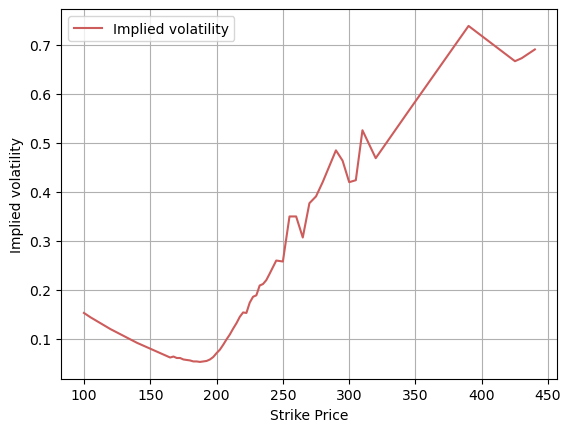

In [8]:
vol_list = []
for i in range(len(df)):
    ex1c = BlaSchMet(200,df['Strike'][i],3,0.05,0.01, 'Put')
    ex1c.set_goal(find_price=False, vol=None, find_vol=True, price=df['Last Price'][i])
    # ex1c.set_goal(find_price=False, vol=None, find_vol=True, price=9)
    vol = ex1c.find_imp_vol(x_guess=0.0001)
    vol_list.append(vol)


fig, ax = plt.subplots()
ax.plot(df['Strike'],vol_list, 
        label='Implied volatility',
        color='indianred')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Implied volatility')
plt.grid()
plt.legend()
plt.show()

<b> Answer: </b> Looking at the graph one can observe that the implied volatility for the asset has a graph with many movements. One can see that when the strike price goes beyond 200, the  implied volatiltiy skyrockets. 

<h2> 1.4 Iterate thorugh vegas</h2>

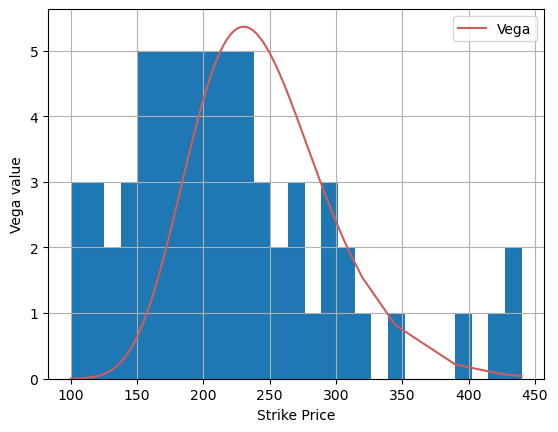

In [9]:
vega_list = []
for i in range(len(df)):
    ex1d = BlaSchMet(200,df['Strike'][i],3,0.05,0.01, 'Put')
    ex1d.set_goal(find_price=True, vol=0.12, find_vol=False, price=0)
    vega = ex1d.vega_calc()
    vega_list.append(vega)

fig, ax = plt.subplots()
ax.plot(df['Strike'],np.array(vega_list)*4, 
        label='Vega', color='indianred')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Vega value')
plt.hist(df['Strike'],bins=27)
plt.grid()
plt.legend()
plt.show()
# plt.savefig('1d.PNG')

<h4> Note to myself: </h4>
<p> The 1.3 plot seems weird, find out why? Furthermore, find similarities between vega and implied volatility.

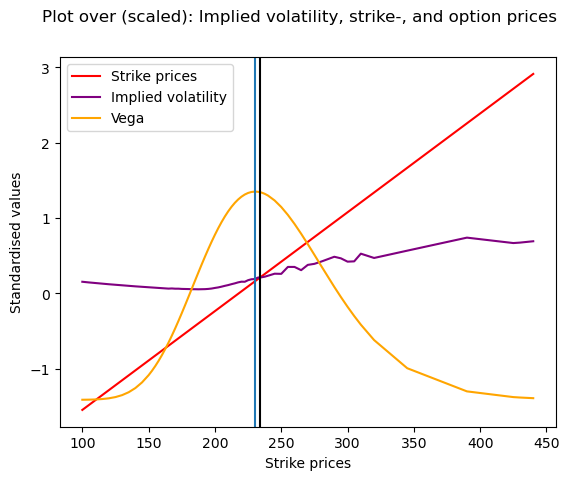

In [10]:
def scale(X):
    X = np.array(X)
    scaled = (X-X.mean())/X.std()
    # scaled = (X-min(X)) / (max(X)-min(X))
    return scaled


fig, ax = plt.subplots()
ax.plot(df['Strike'], scale(df['Strike']), label='Strike prices',color='r')
ax.plot(df['Strike'], vol_list, label='Implied volatility', color='purple')
ax.plot(df['Strike'], scale(vega_list), label='Vega', color='orange')
ax.axvline(234,color='black')
ax.axvline(df['Strike'][42])
# ax.set_xlim(220,240)
# ax.set_ylim(1.2,1.4)
ax.set_xlabel('Strike prices')
ax.set_ylabel('Standardised values')
fig.suptitle('Plot over (scaled): Implied volatility, strike-, and option prices')
plt.legend()
plt.show()

<h1> Task 2 </h1>
<h2> Task 2a </h2>

In [11]:
#BOPM call
ex2ai1 = BinPriMod(200,210,0.2,3,0.3,0.05,'Call','American',)
ex2ai1.set_dividends(cont=True, cont_rate=0.01, TD=None, amount=None)
ex2ai1.storage_values(False)
# ex2ai1.storage_prices()[-1][0]
A_ex2ai1 = ex2ai1.storage_prices(True)[-1][0]
#BOPM put
ex2ai2 = BinPriMod(200, 210, 0.2,3,0.3,0.05,'Put','American',)
ex2ai2.set_dividends(cont=True, cont_rate=0.01, TD=None, amount=None)
ex2ai2.storage_values(False)
A_ex2ai2 = ex2ai2.storage_prices(True)[-1][0]
#BSM call
ex2aii1 = BlaSchMet(200,210,3,0.05,0.01,'Call')
ex2aii1.set_goal(find_price=True,vol=0.2,find_vol=False,price=None)
A_ex2aii1 = ex2aii1 .call_black_scholes()
#BSM put
ex2aii1 = BlaSchMet(200,210,3,0.05,0.01,'Put')
ex2aii1.set_goal(find_price=True,vol=0.2,find_vol=False,price=None)
A_ex2aii2 = ex2aii1.call_black_scholes()
pd.DataFrame({'BSM':[A_ex2aii1,A_ex2aii2],
              'BOPM':[A_ex2ai1, A_ex2ai2]}, index=['Call','Put'])

,BSM,BOPM
Call,32.979069,33.43
Put,19.638638,23.53


<h2> Task 2b </h2>

In [36]:
val_list = []
for i in range(0,100,1):
    ex2bCall  = LeaSquMonCar(200,210,3,0.2,0.05,0.01,'Call',100,10)
    ex2bCall.CreatePaths(post=False)
    ex2bCall.LeastSquares()
    ex2bCall.EarlyExerciseCoordinates()
    val = ex2bCall.OptionPrice()
    val_list.append(val)
print('Call value using LSMC:', round(np.mean(val),4))

Call value using LSMC: 22.4788


In [37]:
val_list = []
for i in range(0,100,1):
    ex2bPut  = LeaSquMonCar(200,210,3,0.2,0.05,0.01,'Put',100,10)
    ex2bPut.CreatePaths(post=False)
    ex2bPut.LeastSquares()
    ex2bPut.EarlyExerciseCoordinates()
    val = ex2bPut.OptionPrice()
    val_list.append(val)
print('Put value using LSMC:', round(val,4))

Put value using LSMC: 16.2391


<h2> Task 2c

In [71]:
ex2c = LeaSquMonCar(200, 210, 3, 0.2, 0.05, 0.01, 'Call', 10000,100)
ex2c.CreatePaths(post=False) 
ex2c.LeastSquares(post=False)
coords = ex2c.EarlyExerciseCoordinates()
val = ex2c.OptionPrice()

In [72]:
print('Call value using LSMC:', round(val,4))
ratio =len(np.where(np.array(coords[0])<660)[0])/10000
print('N_early_exercise / n_paths:', round(ratio,3))

Call value using LSMC: 5.8738
N_early_exercise / n_paths: 0.844


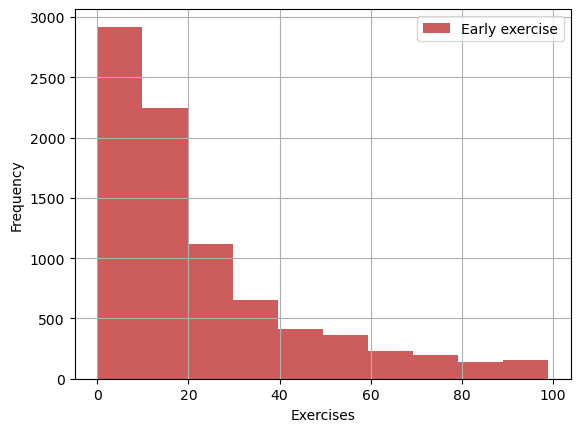

In [73]:
plt.figure()
plt.hist(coords[0], color='indianred',label='Early exercise' )
plt.xlabel('Exercises')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

<h2> Task 2d

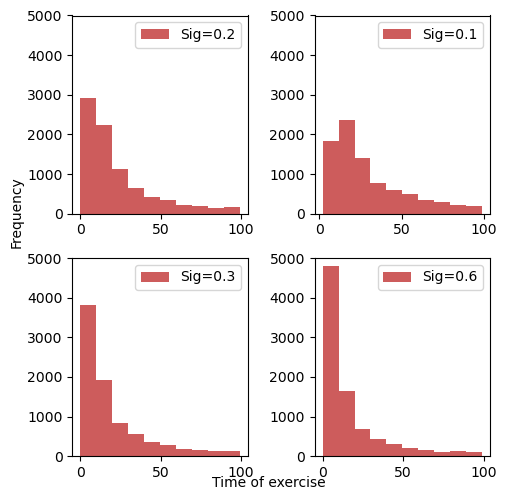

In [75]:
ex2di = LeaSquMonCar(200, 210, 3, 0.1, 0.05, 0.01, 'Call', 10000, 100)
ex2di.CreatePaths(post=False) 
ex2di.LeastSquares(post=False)
coordsA = ex2di.EarlyExerciseCoordinates()

ex2dii = LeaSquMonCar(200, 210, 3, 0.3, 0.05, 0.01, 'Call', 10000, 100)
ex2dii.CreatePaths(post=False) 
ex2dii.LeastSquares(post=False)
coordsB = ex2dii.EarlyExerciseCoordinates()

ex2diii = LeaSquMonCar(200, 210, 3, 0.6, 0.05, 0.01, 'Call', 10000, 100)
ex2diii.CreatePaths(post=False) 
ex2diii.LeastSquares(post=False)
coordsC = ex2diii.EarlyExerciseCoordinates()


axes = [(0,0),(0,1),(1,0),(1,1)]
heights = [coords,coordsA,coordsB,coordsC]
sigs = [0.2,0.1,0.3,0.6]
fig, ax = plt.subplots(2,2, figsize=(5,5))
for i in range(0,4,1):
    ax[axes[i]].hist(heights[i][0], color='indianred', label='Sig='+str(sigs[i]))
    ax[axes[i]].set_ylim(0,5000)
    ax[axes[i]].legend()
fig.text(0.01, 0.5, 'Frequency', ha='center', rotation='vertical')
fig.text(0.4, 0.01, 'Time of exercise', va='bottom')
fig.tight_layout()
plt.show()

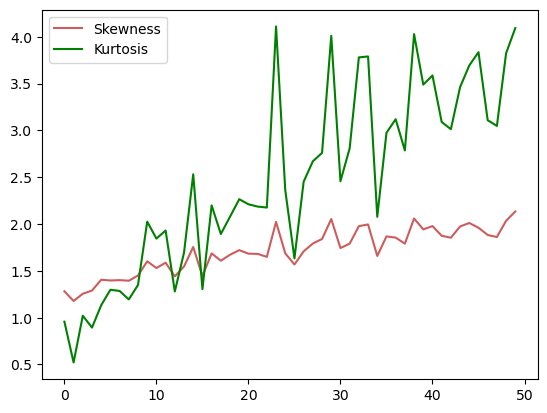

In [85]:
kurt_list = []
skew_list = []
for i in range(10,60,1):
    ex2d = LeaSquMonCar(200, 210, 3, i/100, 0.05, 0.01, 'Call', 1000, 100)
    ex2d.CreatePaths(post=True) 
    ex2d.LeastSquares()
    coords = ex2d.EarlyExerciseCoordinates()[0]
    kurt_list.append(st.kurtosis(coords))
    skew_list.append(st.skew(coords))

plt.figure()
plt.plot(skew_list,color='indianred', label='Skewness')
plt.plot(kurt_list, color='green', label='Kurtosis')
plt.legend()
plt.show()

<h1> Task 3

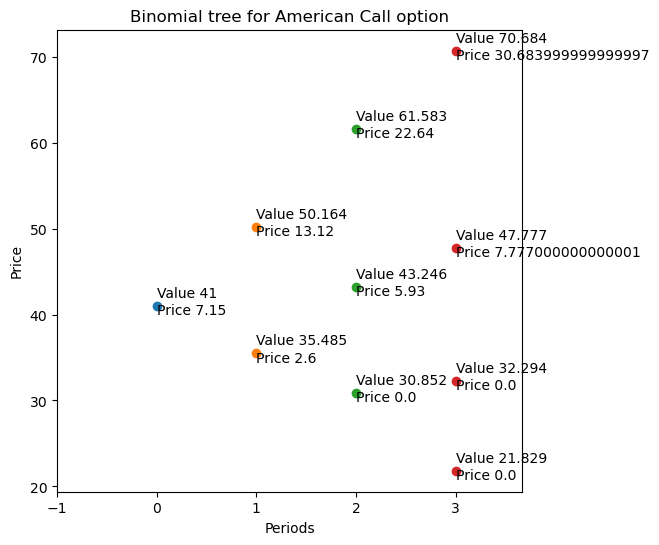

In [89]:
myTree = BinPriMod(41, 40, 0.3392, 1, 1/3, 0.08, 'Call', 'American')
myTree.set_dividends(cont=False, cont_rate=0, TD=8/12, amount=5)
# myTree.set_dividends(cont=True, cont_rate=0.02, TD=None, amount=None)
myTree.storage_values(False)
myTree.storage_prices(False)
myTree.plot_tree(1)